<a href="https://colab.research.google.com/github/Nicogs43/KNN_coverage_constraint_query/blob/master/Analysis_df_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np 
import pandas as pd
import re
import io
from google.colab import files
from google.colab import data_table
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,10)

In [2]:
sample_size = 9604

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
pd.set_option("max_colwidth", None)

In [4]:
uploaded = files.upload()
uploaded_1 = files.upload()
uploaded_2 = files.upload()
rewriting_df = pd.read_csv(io.BytesIO(uploaded['test_result_1.csv']))
execution_res_df = pd.read_csv(io.BytesIO(uploaded_1['test_result_exec_1.csv']))
execution_Qind_df = pd.read_csv(io.BytesIO(uploaded_2['test_Qind_exec_1.csv']))

Saving test_result_1.csv to test_result_1.csv


Saving test_result_exec_1.csv to test_result_exec_1.csv


Saving test_Qind_exec_1.csv to test_Qind_exec_1.csv


In [ ]:
uploaded_3 = files.upload()
adult_data = pd.read_csv(io.BytesIO(uploaded_3['adult_data.csv']))


Saving adult_data.csv to adult_data.csv


In [ ]:
row_cont_df = len(adult_data.index)
row_cont_df#48842

In [5]:
def manage_column_with_long_value_two(series):
  series = series.map(lambda x: x.strip('[]'))
  res = []
  for i, v in series.items():
    if(',' in v):
      temp = v.split(',')
      res.append(float(temp[0]))
      res.append(float(temp[1]))
      continue
    res.append(float(v))
  return np.array(res)

# DataFrame: Rewriting

In [6]:
rewriting_df

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,proximity_qcut,relaxation_degree,disparity_index,fairness_index,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q1.csv,100,2026,[50],3409,[134],0.036262,0.682626,[0.0393077148723966],[0.01561238680965479],0.004273,0.038841,0.018018,0.061132
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q2.csv,120,234,[111],318,[132],0.160375,0.358974,[0.41509433962264153],[-0.19276160503540518],0.006700,0.064018,0.047800,0.118518
2,3,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q3.csv,500,6360,[401],8514,[608],0.035070,0.338679,[0.0714117923420249],[0.009610447510726289],0.006157,0.081321,0.355778,0.443255
3,4,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q4.csv,300,6360,"[217, 62]",9956,"[311, 97]",0.214580,0.565409,"[0.031237444756930494, 0.009742868621936521]","[-0.003080073523312153, -5.669008922922977e-06]",0.006262,0.109850,1.576771,1.692883
4,5,SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_gain > 500,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q5.csv,80,623,[43],1368,[78],0.170000,1.195827,[0.05701754385964912],[-0.013672814755412988],0.008297,0.062841,1.596899,1.668037
5,6,SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q6.csv,900,26504,[665],32431,[1007],0.353553,0.223627,[0.031050538065431222],[0.006309280160659587],0.003923,0.075006,0.020953,0.099881
6,7,SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q7.csv,1600,26504,[1423],32431,[1876],0.353553,0.223627,[0.05784588819339521],[0.004661305160512469],0.003849,0.074815,0.020282,0.098947
7,8,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 50 AND hours_per_week > 30,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q8.csv,1600,30962,[1496],34825,[1705],0.077069,0.124766,[0.04895908111988514],[0.0007090891786849379],0.006399,0.166624,0.687558,0.860581
8,9,SELECT * FROM adult_data WHERE age <= 40 AND education_num < 13 AND hours_per_week > 30 AND capital_gain < 500,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q9.csv,500,16842,[416],18483,[448],0.023521,0.097435,[0.024238489422712763],[-0.00048511540748772883],0.008132,0.078596,0.284706,0.371434
9,10,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q10.csv,400,2026,[378],3409,[812],0.036262,0.682626,[0.23819301848049282],[0.08329953157302489],0.004236,0.039457,0.017990,0.061683


In [ ]:
manage_column_with_long_value_two(execution_res_df['average_time_norm_data_and_comp_q']).std()#fare i calcoli per tutte quelle colonne che hanno un elemento lungo 2

0.03992634679515504

In [ ]:
rewriting_df.agg(
    {
        "card_true_tot_newQ": ["min", "max", "median", "mean","std"],
        "proximity_qcut": ["min", "max", "median", "mean","std"],
        "relaxation_degree": ["min", "max", "median", "mean","std"],
        "qcut_average_time_preprocessing": ["min", "max", "median", "mean"],
        "qcut_average_time_pruning": ["min", "max", "median", "mean"],
        "qcut_average_time_algo": ["min", "max", "median", "mean"],
        "qcut_mean_summed_time": ["min", "max", "median", "mean","std"]
    }
)

,card_true_tot_newQ,proximity_qcut,relaxation_degree,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time
min,318.000000,0.008553,0.006158,0.003849,0.038280,0.017556,0.060198
max,34825.000000,0.580180,1.934189,0.008899,0.166624,8.915868,9.050352
median,8514.000000,0.056362,0.131641,0.006577,0.074815,0.087493,0.184088
mean,13005.897436,0.128593,0.334432,0.006440,0.076581,0.862399,0.945420
std,11748.163999,0.152873,0.457692,NaN,NaN,NaN,1.921022


# DataFrame: Execution 

In [7]:
execution_res_df

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,relaxation_degree,disparity_index,fairness_index,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q1_norm.csv,"[{'AS': ['race'], 'value': ['Black'], 'num': '100'}]",2026,[50],2076,[100],0.024679,[0.04816955684007707],[0.025303643724696356],0.199104,0.03645443916320801,0.017531371116638182,0.000006,0.000014,0.004542779922485351,0.050508
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],243,[120],0.038462,[0.49382716049382713],[0.07317073170731703],0.191635,0.1166724443435669,0.09062497615814209,0.000006,0.000016,0.017288351058959962,0.142554
2,3,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q3_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '500'}]",6360,[401],6459,[500],0.015566,[0.07741136398823348],[0.016613525759355596],0.193152,0.03059844970703125,0.010845088958740234,0.000007,0.000017,0.002292966842651367,0.046195
3,4,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q4_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '300'}, {'AS': ['race'], 'value': ['Amer-Indian-Eskimo'], 'num': '100'}]",6360,"[217, 62]",6481,"[300, 100]",0.019025,"[0.046289152908501774, 0.015429717636167259]","[0.013211075735998452, 0.005827129793320507]",0.198267,"[0.025095486640930177, 0.020028448104858397]","[0.007382416725158691, 0.002557039260864258]",0.000006,0.000017,"[0.0012461423873901367, 0.00037550926208496094]",0.062117
4,5,SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_gain > 500,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q5_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '80'}]",623,[43],660,[80],0.059390,[0.12121212121212122],[0.06379310344827586],0.192491,0.029567885398864745,0.011144185066223144,0.000007,0.000017,0.0007787942886352539,0.039594
5,6,SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q6_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '900'}]",26504,[665],26739,[900],0.008867,[0.03365870077415012],[0.00909477920972174],0.198532,0.0127593994140625,0.003258013725280762,0.000007,0.000016,0.0004756689071655273,0.043969
6,7,SELECT * FROM adult_data WHERE education_num < 12 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q7_norm.csv,"[{'AS': ['sex', 'marital_status'], 'value': ['Female', 'Married-civ-spouse'], 'num': '1600'}]",26504,[1423],26681,[1600],0.006678,[0.05996776732506278],[0.007057134882979148],0.197582,0.01488947868347168,0.003937745094299316,0.000006,0.000016,0.000465703010559082,0.049089
7,8,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 50 AND hours_per_week > 30,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q8_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '1600'}]",30962,[1496],31066,[1600],0.003359,[0.051503251142728385],[0.0035294916174574073],0.192651,0.014049339294433593,0.0045842409133911135,0.000007,0.000019,0.000611567497253418,0.054608
8,9,SELECT * FROM adult_data WHERE age <= 40 AND education_num < 13 AND hours_per_week > 30 AND capital_gain < 500,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q9_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '500'}]",16842,[416],16926,[

In [ ]:
manage_column_with_long_value_two(execution_res_df['disparity_index']).std()
manage_column_with_long_value_two(execution_res_df['disparity_index']).mean()
manage_column_with_long_value_two(execution_res_df['disparity_index'])

array([0.04816956, 0.49382716, 0.07741136, 0.04628915, 0.01542972,
       0.12121212, 0.0336587 , 0.05996777, 0.05150325, 0.02954035,
       0.1953125 , 0.08264463, 0.61919505, 0.30120482, 0.5186722 ,
       0.11904762, 0.34096721, 0.31237485, 0.18068536, 0.03503065,
       0.70222989, 0.39881109, 0.41208286, 0.4288931 , 0.44860071,
       0.47063253, 0.08018328, 0.07969639, 0.07969639, 0.0793351 ,
       0.0793351 , 0.33240403, 0.42246521, 0.43646945, 0.47711404,
       0.52668539, 0.32326795, 0.10644546, 0.05004416, 0.32421561,
       0.10604842, 0.31270335, 0.32370518])

In [ ]:
execution_res_df.agg({
    "card_true_tot_newQ": ["min", "max", "median", "mean","std"],
    "relaxation_degree": ["min", "max", "median", "mean","std"],
    "average_time_read_table": ["min", "max", "median", "mean","std"],
    "average_time_norm_point": ["min", "max", "median", "mean","std"],
    "average_time_execution": ["min", "max", "median", "mean","std"],
})
# la funzione mean di pandas è meno accurata di quella di numpy però solo nei casi di numeri molto grandi o molto precisi 

,card_true_tot_newQ,relaxation_degree,average_time_read_table,average_time_norm_point,average_time_execution
min,242.000000,0.002029,0.191635,0.000014,0.039594
max,31066.000000,0.547352,0.209249,0.000022,0.253255
median,8025.000000,0.018329,0.197761,0.000018,0.093222
mean,11628.358974,0.048272,0.196816,0.000018,0.102908
std,10680.638896,0.103698,0.004462,0.000002,0.053527


In [ ]:
row_cont_df#il tempo più lungo è quello per leggere le tabelle 

48842

In [ ]:
execution_res_df[execution_res_df['id']==19]

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,relaxation_degree,disparity_index,fairness_index,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution
18,19,SELECT * FROM adult_data WHERE age >= 38 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q19_norm.csv,"[{'AS': ['sex', 'marital_status'], 'value': ['Female', 'Married-civ-spouse'], 'num': '280'}]",7962,[249],7993,[280],0.003893,[0.0350306518203428],[0.004019188383249057],0.191816,0.027048349380493164,0.008522391319274902,0.000006,0.000014,0.0007104158401489257,0.041039


In [ ]:
execution_res_df[execution_res_df['id']==20
                 ]

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,relaxation_degree,disparity_index,fairness_index,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution
19,20,SELECT * FROM adult_data WHERE age >= 38 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q20_norm.csv,"[{'AS': ['marital_status'], 'value': ['Married-civ-spouse'], 'num': '5700'}]",7962,[5545],8117,[5700],0.019467,[0.7022298878896144],[0.06412908564335984],0.192206,0.08933560848236084,0.06515214443206788,0.000006,0.000015,0.02193319797515869,0.125521


In [ ]:
rewriting_df[rewriting_df['id']==1]

,id,query,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_newQ,card_true_sa_newQ,proximity_qcut,relaxation_degree,disparity_index,fairness_index,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q1.csv,100,2026,[50],3409,[134],0.036262,0.682626,[0.0393077148723966],[0.01561238680965479],0.004273,0.038841,0.018018,0.061132


https://www.ibm.com/docs/en/db2/11.5?topic=concepts-selectivity-predicates

# Confronto fra gli approcci Rewriting ed Execution

In [8]:
df_comparison_res = pd.merge(rewriting_df,execution_res_df,suffixes=("_rew","_exec"),on="id")
df_comparison_res['best_approach'] = np.where(df_comparison_res['qcut_mean_summed_time'] > df_comparison_res['average_time_execution'],'Execution','Rewriting')

In [9]:
#'disparity_index_rew','disparity_index_exec','fairness_index_rew','fairness_index_exec'
df_comparison_res['fairness_index_exec'] = df_comparison_res['fairness_index_exec'].map(lambda x: x.strip('[]'))#,'disparity_index_exec','fairness_index_rew','fairness_index_exec']].strip('[]')

In [10]:
df_comparison_res

,id,query_rew,path_rew,Coverage Constraint_rew,card_true_tot_Q_rew,card_true_sa_Q_rew,card_true_tot_newQ_rew,card_true_sa_newQ_rew,proximity_qcut,relaxation_degree_rew,disparity_index_rew,fairness_index_rew,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time,query_exec,path_exec,Coverage Constraint_exec,card_true_tot_Q_exec,card_true_sa_Q_exec,card_true_tot_newQ_exec,card_true_sa_newQ_exec,relaxation_degree_exec,disparity_index_exec,fairness_index_exec,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution,best_approach
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q1.csv,100,2026,[50],3409,[134],0.036262,0.682626,[0.0393077148723966],[0.01561238680965479],0.004273,0.038841,0.018018,0.061132,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q1_norm.csv,"[{'AS': ['race'], 'value': ['Black'], 'num': '100'}]",2026,[50],2076,[100],0.024679,[0.04816955684007707],0.025303643724696356,0.199104,0.03645443916320801,0.017531371116638182,0.000006,0.000014,0.004542779922485351,0.050508,Execution
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q2.csv,120,234,[111],318,[132],0.160375,0.358974,[0.41509433962264153],[-0.19276160503540518],0.006700,0.064018,0.047800,0.118518,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],243,[120],0.038462,[0.49382716049382713],0.07317073170731703,0.191635,0.1166724443435669,0.09062497615814209,0.000006,0.000016,0.017288351058959962,0.142554,Rewriting
2,3,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q3.csv,500,6360,[401],8514,[608],0.035070,0.338679,[0.0714117923420249],[0.009610447510726289],0.006157,0.081321,0.355778,0.443255,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q3_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '500'}]",6360,[401],6459,[500],0.015566,[0.07741136398823348],0.016613525759355596,0.193152,0.03059844970703125,0.010845088958740234,0.000007,0.000017,0.002292966842651367,0.046195,Execution
3,4,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q4.csv,300,6360,"[217, 62]",9956,"[311, 97]",0.214580,0.565409,"[0.031237444756930494, 0.009742868621936521]","[-0.003080073523312153, -5.669008922922977e-06]",0.006262,0.109850,1.576771,1.692883,SELECT * FROM adult_data WHERE capital_loss < 1500 AND age < 55 AND hours_per_week < 35,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q4_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '300'}, {'AS': ['race'], 'value': ['Amer-Indian-Eskimo'], 'num': '100'}]",6360,"[217, 62]",6481,"[300, 100]",0.019025,"[0.046289152908501774, 0.015429717636167259]","0.013211075735998452, 0.005827129793320507",0.198267,"[0.025095486640930177, 0.020028448104858397]","[0.007382416725158691, 0.002557039260864258]",0.000006,0.000017,"[0.0012461423873901367, 0.00037550926208496094]",0.062117,Execution
4,5,SELECT * FROM adult_data WHERE age <= 40 AND education_num >= 13 AND hours_per_week > 30 AND capital_gain > 500,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q5.csv,80,623,[43],1368,[78],0.170000,1.195827,[0.05701754385964912],[-0.013672814755412988],0.008297,0.062841,1.596899,1.668037,SELECT * FROM adult_data WHERE

In [11]:
df_comparison_rew_exec= df_comparison_res[['id','query_rew','query_exec','relaxation_degree_rew','relaxation_degree_exec','disparity_index_rew','disparity_index_exec','fairness_index_rew','fairness_index_exec','qcut_mean_summed_time','average_time_execution','best_approach']]
#df_comparison_rew_exec.to_csv("confronto_rew_exec.csv")
#files.download("confronto_rew_exec.csv")

In [12]:
data_table.DataTable(df_comparison_rew_exec[['id','relaxation_degree_rew','relaxation_degree_exec','disparity_index_rew','disparity_index_exec','fairness_index_rew','fairness_index_exec','qcut_mean_summed_time','average_time_execution','best_approach']], include_index=False, num_rows_per_page=10)
#df_comparison_rew_exec[['id','relaxation_degree_rew','relaxation_degree_exec','disparity_index_rew','disparity_index_exec','fairness_index_rew','fairness_index_exec','qcut_mean_summed_time','average_time_execution']]

,id,relaxation_degree_rew,relaxation_degree_exec,disparity_index_rew,disparity_index_exec,fairness_index_rew,fairness_index_exec,qcut_mean_summed_time,average_time_execution,best_approach
0,1,0.682626,0.024679,[0.0393077148723966],[0.04816955684007707],[0.01561238680965479],0.025303643724696356,0.061132,0.050508,Execution
1,2,0.358974,0.038462,[0.41509433962264153],[0.49382716049382713],[-0.19276160503540518],0.07317073170731703,0.118518,0.142554,Rewriting
2,3,0.338679,0.015566,[0.0714117923420249],[0.07741136398823348],[0.009610447510726289],0.016613525759355596,0.443255,0.046195,Execution
3,4,0.565409,0.019025,"[0.031237444756930494, 0.009742868621936521]","[0.046289152908501774, 0.015429717636167259]","[-0.003080073523312153, -5.669008922922977e-06]","0.013211075735998452, 0.005827129793320507",1.692883,0.062117,Execution
4,5,1.195827,0.059390,[0.05701754385964912],[0.12121212121212122],[-0.013672814755412988],0.06379310344827586,1.668037,0.039594,Execution
5,6,0.223627,0.008867,[0.031050538065431222],[0.03365870077415012],[0.006309280160659587],0.00909477920972174,0.099881,0.043969,Execution
6,7,0.223627,0.006678,[0.05784588819339521],[0.05996776732506278],[0.004661305160512469],0.007057134882979148,0.098947,0.049089,Execution
7,8,0.124766,0.003359,[0.04895908111988514],[0.051503251142728385],[0.0007090891786849379],0.0035294916174574073,0.860581,0.054608,Execution
8,9,0.097435,0.004988,[0.024238489422712763],[0.029540352120997284],[-0.00048511540748772883],0.0051138439060026755,0.371434,0.042330,Execution
9,10,0.682626,0.010859,[0.23819301848049282],[0.1953125],[0.08329953157302489],0.01334951456310679,0.061683,0.124169,Rewriting


[]

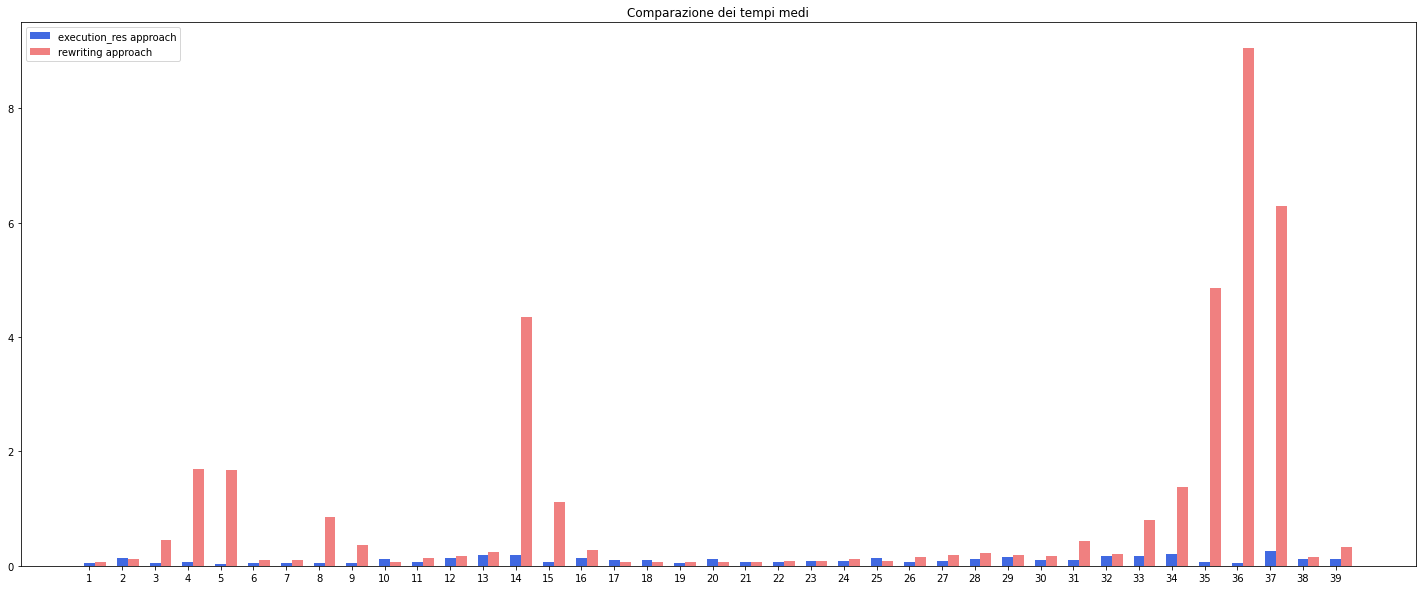

In [22]:
width = np.min(np.diff(range(len(execution_res_df["id"]))))/3
plt.bar(execution_res_df['id'], execution_res_df['average_time_execution'], width, color='royalblue', label='execution_res approach')
plt.bar(rewriting_df['id']+width, rewriting_df['qcut_mean_summed_time'], width, color='lightcoral', label ='rewriting approach')
plt.xticks(rewriting_df['id'])
plt.title("Comparazione dei tempi medi")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

In [ ]:
np.where(rewriting_df['qcut_mean_summed_time']<execution_res_df['average_time_execution'],True,False)

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
df_rew_time_min_of_exec = rewriting_df.loc[[1,9,16,17,19,24],:]
df_exec_time_more_of_rew = execution_res_df.loc[[1,9,16,17,19,24],:]
res = pd.merge(df_rew_time_min_of_exec, df_exec_time_more_of_rew, on="id")
res

,id,query_x,path_x,Coverage Constraint_x,card_true_tot_Q_x,card_true_sa_Q_x,card_true_tot_newQ_x,card_true_sa_newQ_x,proximity_qcut,relaxation_degree_x,disparity_index_x,fairness_index_x,qcut_average_time_preprocessing,qcut_average_time_pruning,qcut_average_time_algo,qcut_mean_summed_time,query_y,path_y,Coverage Constraint_y,card_true_tot_Q_y,card_true_sa_Q_y,card_true_tot_newQ_y,card_true_sa_newQ_y,relaxation_degree_y,disparity_index_y,fairness_index_y,average_time_read_table,average_time_norm_data_and_comp_q,average_time_norm_data,average_time_q_comp,average_time_norm_point,average_time_tree_exec,average_time_execution
0,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q2.csv,120,234,[111],318,[132],0.160375,0.358974,[0.41509433962264153],[-0.19276160503540518],0.006700,0.064018,0.047800,0.118518,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],243,[120],0.038462,[0.49382716049382713],[0.07317073170731703],0.191635,0.1166724443435669,0.09062497615814209,0.000006,0.000016,0.017288351058959962,0.142554
1,10,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q10.csv,400,2026,[378],3409,[812],0.036262,0.682626,[0.23819301848049282],[0.08329953157302489],0.004236,0.039457,0.017990,0.061683,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q10_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '400'}]",2026,[378],2048,[400],0.010859,[0.1953125],[0.01334951456310679],0.192570,0.08477630615234374,0.060116028785705565,0.000006,0.000015,0.029681134223937988,0.124169
2,17,SELECT * FROM adult_data WHERE age <= 46 AND education_num >= 14,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q17.csv,780,2447,[730],2711,[791],0.032141,0.107887,[0.2917742530431575],[-0.013180996408464374],0.004315,0.038615,0.018028,0.060958,SELECT * FROM adult_data WHERE age <= 46 AND education_num >= 14,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q17_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '780'}]",2447,[730],2497,[780],0.020433,[0.31237484981978375],[0.02912055911473499],0.192775,0.0819206953048706,0.0580157995223999,0.000006,0.000014,0.009947109222412109,0.101635
3,18,SELECT * FROM adult_data WHERE hours_per_week > 40 AND age >= 38,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q18.csv,1450,7962,[1387],8458,[1461],0.033672,0.062296,[0.17273587136438875],[-0.00214679729661435],0.004362,0.038280,0.017556,0.060198,SELECT * FROM adult_data WHERE age >= 38 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q18_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '1450'}]",7962,[1387],8025,[1450],0.007913,[0.1806853582554517],[0.009581749049429655],0.192226,0.07882387638092041,0.05647177696228027,0.000006,0.000015,0.013284730911254882,0.105086
4,20,SELECT * FROM adult_data WHERE hours_per_week > 40 AND age >= 38,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q20.csv,5700,7962,[5545],8458,[5879],0.033672,0.062296,[0.6950815795696382],[-0.014600598738129023],0.004375,0.040025,0.017725,0.062126,SELECT * FROM adult_data WHERE age >= 38 AND hours_per_week > 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q20_norm.csv,"[{'AS': ['marital_status'], 'value': ['Married-civ-spouse'], 'num': '5700'}]",7962,[5545],8117,[5700],0.019467,[0.7022298878896144],[0.06412908564335984],0.192206,0.08933560848236084,0.06515214443206788,0.000006,0.000015,0.02193319797515869,0.125521
5,25,SELECT * FROM adult_data WHERE education_num >= 13 AND age < 35 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_rewriting\rewriting_sample_Q25.csv,1250,2603,[1


*   The **relaxation degree**, quantifies how much 𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 relaxes the input query 𝑄, as the percentage of new tuples returned by
𝑄𝑜𝑝𝑡
𝑆,𝐶𝐶 with respect to those contained in the input query result. The lower the relaxation
degree, the lower is the applied relaxation.
*   **Fairness index**. For each coverage constraint 𝐶, this measure computes the difference in the
distribution of protected and unprotected groups in the result of the input query and the
rewritten one. Information about the distribution can be obtained by computing the fairness
rate 𝑓 () of the instances satisfying the constraints and those do not satisfying it. Statistical
parity is achieved by a query result for fairness rate values close to 1. Values of the fairness
index are between 1 and -1: values close to 1 means that the AOR improves statistical parity.
*   **Disparity index** is the ratio between the value of the cardinality of the protected group and the value of the cardinality of the rewritten query




[]

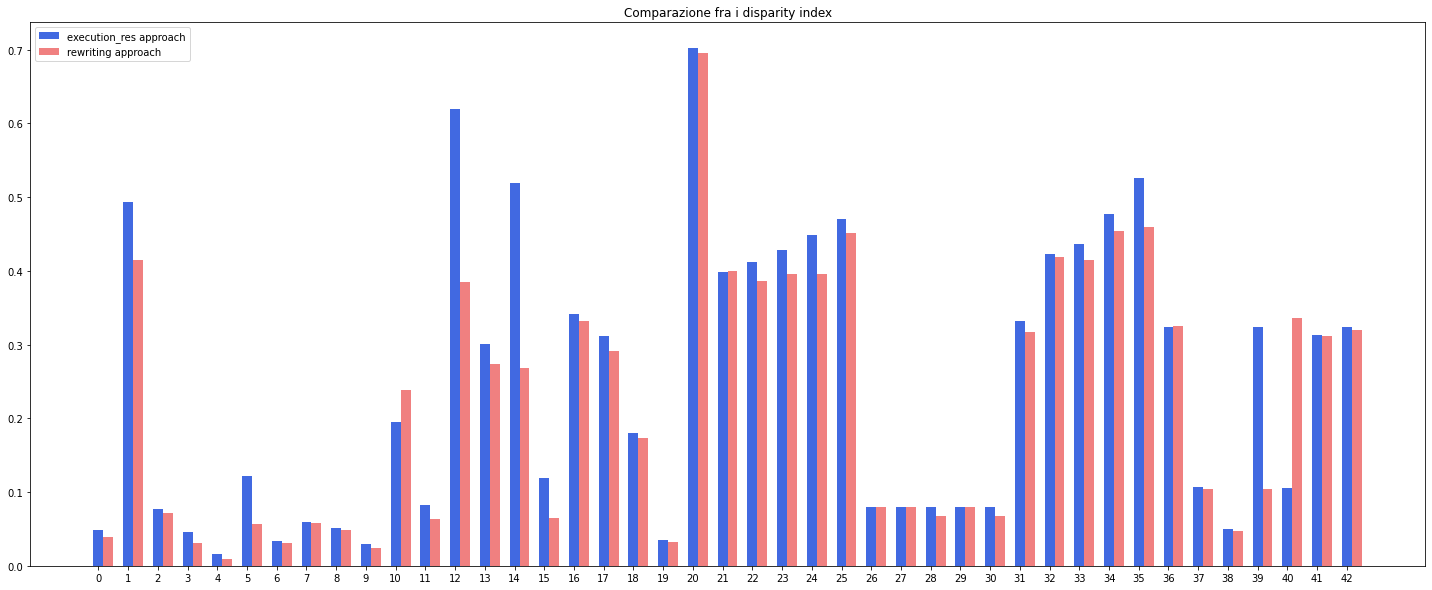

In [29]:
plt.bar(range(len(manage_column_with_long_value_two(rewriting_df['disparity_index']))),
            manage_column_with_long_value_two(execution_res_df['disparity_index']),width, color='royalblue',label='execution_res approach')
plt.bar(range(len(manage_column_with_long_value_two(rewriting_df['disparity_index'])))+width,
            manage_column_with_long_value_two(rewriting_df['disparity_index']),width, color='lightcoral',label ='rewriting approach')
plt.xticks(range(len(manage_column_with_long_value_two(rewriting_df['disparity_index']))))
plt.title("Comparazione fra i disparity index")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

In [17]:
print(np.where(manage_column_with_long_value_two(rewriting_df['disparity_index'])<manage_column_with_long_value_two(execution_res_df['disparity_index']),True,False))
#sempre la query 10 sarà un caso fortutito(manca la query 2 in realà)

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False  True  True]


[]

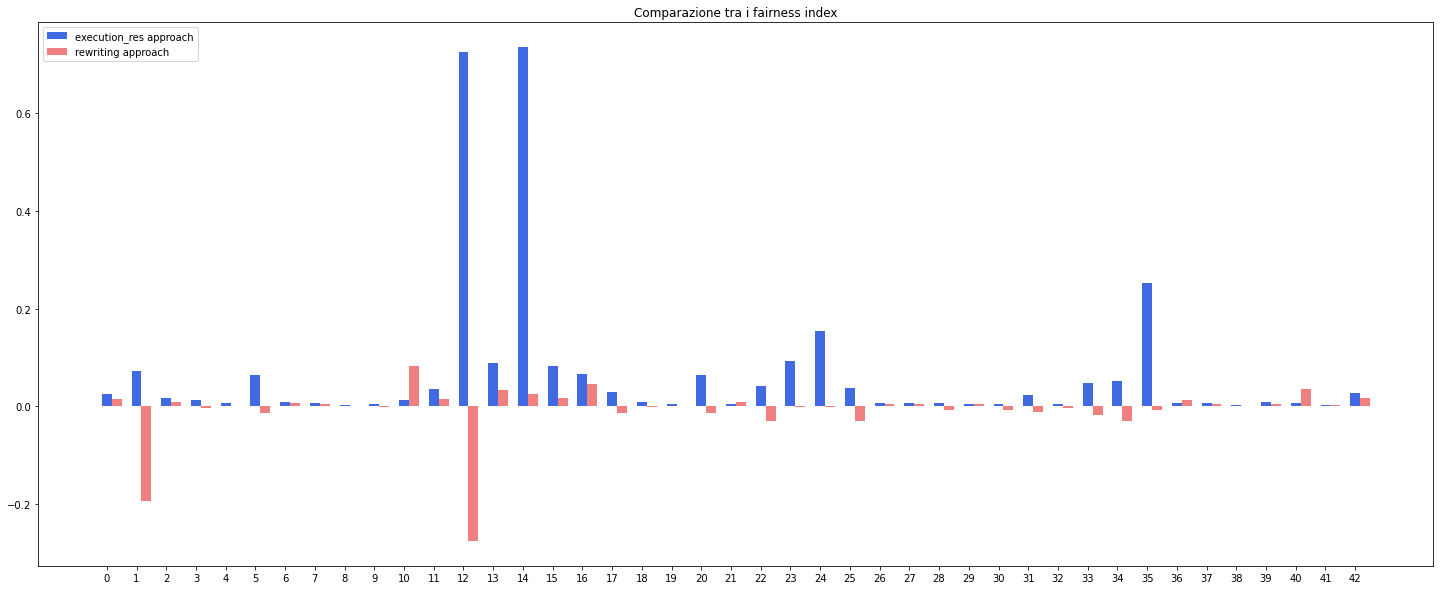

In [30]:
test1_rew = manage_column_with_long_value_two(rewriting_df['fairness_index'])
plt.bar(range(len(test1_rew)),manage_column_with_long_value_two(execution_res_df['fairness_index']),width,
            color='royalblue',label='execution_res approach')
plt.bar(range(len(test1_rew))+width,manage_column_with_long_value_two(rewriting_df['fairness_index']),width,
            color='lightcoral',label ='rewriting approach')
plt.xticks(range(len(test1_rew)))
plt.title("Comparazione tra i fairness index")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

In [19]:
fairness_test = np.where(manage_column_with_long_value_two(rewriting_df['fairness_index'])<manage_column_with_long_value_two(execution_res_df['fairness_index']),True , False)
fairness_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True])

[]

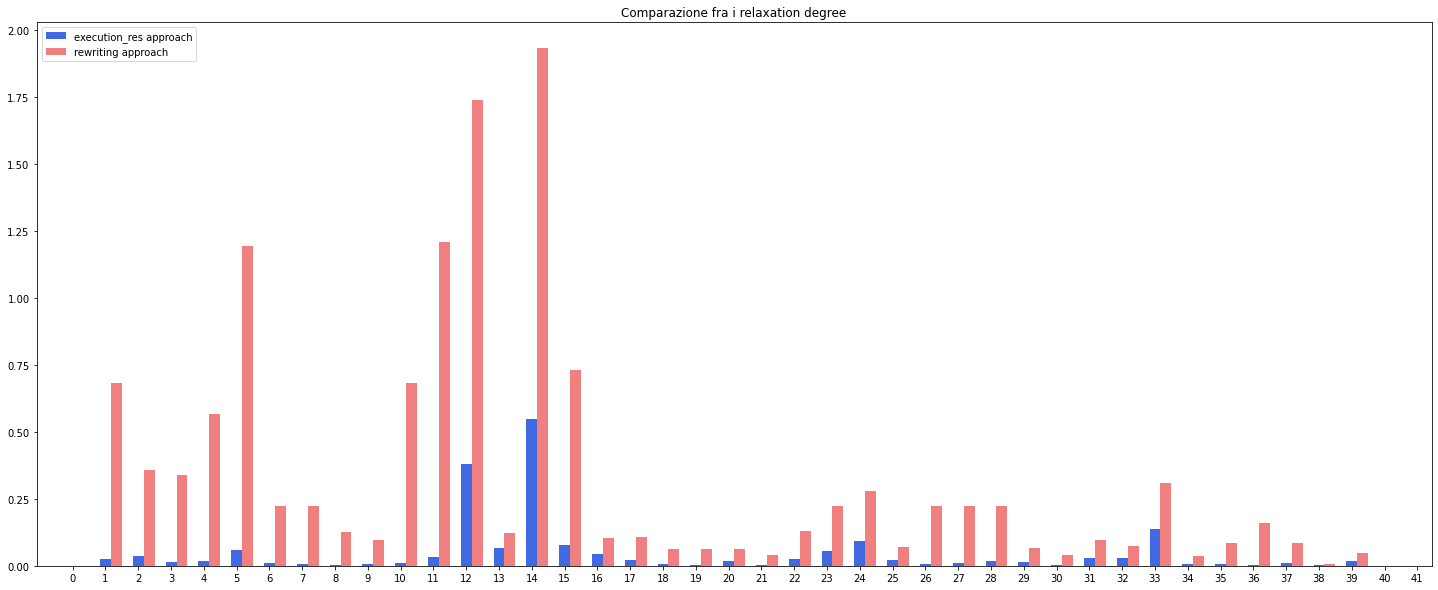

In [31]:
plt.bar(rewriting_df['id'],execution_res_df['relaxation_degree'],width,
            color='royalblue',label='execution_res approach')
plt.bar(rewriting_df['id']+width,rewriting_df['relaxation_degree'],width,
            color='lightcoral',label ='rewriting approach')
plt.xticks(range(len(test1_rew)))
plt.title("Comparazione fra i relaxation degree")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()


Pare che con l'approccio rewriting si rilassino di più la query per il risultato, probabilmente perchè questo approccio non si limita a trovare strettamente quei valori che mancano per raggiunger il vaolre del CC.
L'indice di fairness nel caso rewriting invece è più basso rispetto a quello di execution mostrando come la parità statistica tra il gruppo protetto e quello non protetto è migliore con l'approccio execution.Anche la misura disparity index appare in larga parte maggiore(tranne nelle solite query) nell'approccio execution rispetto a quello rewriting.
Quindi, l'unico caso in cui la misura è migliore nell'approccio rewriting, è nel caso della relaxation degree, come credo fosse ipotizzabile, dato che l'approccio execution non è orientato a riscrivere la query ma prima a trovare gli elementi mancanti per raggiungere il numero stabilito nel CC tramite la ricerca dei vicini più prossimi.

Si nota come il tempo medio di esecuzione sia migliore, nel senso più veloce, nell'approccio execution_res rispetto all'approccio rewriting.
Solo in due casi, quanto detto poco sopra, viene smentito. In corrispondenza della seconda query (SELECT * FROM adult_data WHERE education_num >= 14 AND age < 30 AND hours_per_week <= 45) e nella decima(SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 40). Questo comportamento potrebbe essere figlio del fatto che il kdtree è più performante quando non deve agire su numeri grandi di dati(o osservazioni, il numero di dimensioni o features, che sia grandi o piccole non influenzano molto la performance dell'algoritmo) in questo caso i nuovi elementi da trovare per raggiungere il CC dato che già con la query di input si ha un buon numero di elementi del gruppo protetto.

Controllare la distribuzione come ha detto la stefania 

[What is a Good Nearest Neighbors Algorithm
for Finding Similar Patches in Images?
](https://www1.cs.columbia.edu/CAVE/publications/pdfs/Kumar_ECCV08_2.pdf)

[Tree algorithms explained: Ball Tree Algorithm vs. KD Tree vs. Brute Force](https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940)

# DataFrame: Execution Qind

In [13]:
execution_Qind_df['summed_avg_time_exec_qind'] = execution_res_df['average_time_execution'] + execution_Qind_df['average_time_exec_Qind']

In [14]:
execution_Qind_df

,id,Qind,path,Coverage Constraint,card_true_tot_Q,card_true_sa_Q,card_true_tot_Qind,card_true_sa_Qind,relaxation_degree_Qind,disparity_index_Qind,fairness_index_Qind,proximity_Qind,average_time_exec_Qind,summed_avg_time_exec_qind
0,1,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 39,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q1_norm.csv,"[{'AS': ['race'], 'value': ['Black'], 'num': '100'}]",2026,[50],3403,[134],0.679664,[0.015687485060864977],[0.03937702027622686],0.025641,0.000300,0.050809
1,2,SELECT * FROM adult_data WHERE education_num >= 14 AND age < 33 AND hours_per_week <= 46,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q2_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '120'}]",234,[111],388,[169],0.658120,[-0.13074952667334894],[0.43556701030927836],0.053319,0.000322,0.142876
2,3,SELECT * FROM adult_data WHERE capital_loss < 2340 AND age < 69 AND hours_per_week < 51,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q3_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '500'}]",6360,[401],42177,[2193],5.631604,[-0.012446231219455393],[0.05199516324062878],0.555882,0.000343,0.046539
3,4,SELECT * FROM adult_data WHERE capital_loss < 1591 AND age < 60 AND hours_per_week < 44,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q4_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '300'}, {'AS': ['race'], 'value': ['Amer-Indian-Eskimo'], 'num': '100'}]",6360,"[217, 62]",30785,"[1060, 347]",3.840409,"[0.0003354587818473337, 0.0015558283589079697]","[0.03443235341887283, 0.011271723241838557]",0.202975,0.000338,0.062456
4,5,SELECT * FROM adult_data WHERE age <= 46 AND education_num >= 12 AND hours_per_week > 23 AND capital_gain > 0,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q5_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '80'}]",623,[43],1070,[56],0.717496,[-0.018911106576889068],[0.052336448598130844],1.039042,0.000535,0.040129
5,6,SELECT * FROM adult_data WHERE education_num < 14 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q6_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '900'}]",26504,[665],32431,[1007],0.223627,[0.006309280160659587],[0.031050538065431222],0.500000,0.000323,0.044292
6,7,SELECT * FROM adult_data WHERE education_num < 14 AND hours_per_week <= 40,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q7_norm.csv,"[{'AS': ['sex', 'marital_status'], 'value': ['Female', 'Married-civ-spouse'], 'num': '1600'}]",26504,[1423],32431,[1876],0.223627,[0.004661305160512469],[0.05784588819339521],0.500000,0.000314,0.049403
7,8,SELECT * FROM adult_data WHERE capital_loss < 1905 AND age < 69 AND hours_per_week > 19,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q8_norm.csv,"[{'AS': ['sex', 'race'], 'value': ['Female', 'Black'], 'num': '1600'}]",30962,[1496],44712,[2166],0.444093,[0.00013922430268031166],[0.04844337090713902],0.624188,0.000475,0.055083
8,9,SELECT * FROM adult_data WHERE age <= 46 AND education_num < 15 AND hours_per_week > 23 AND capital_gain < 7689,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q9_norm.csv,"[{'AS': ['race'], 'value': ['Asian-Pac-Islander'], 'num': '500'}]",16842,[416],30942,[965],0.837193,[0.006865643545598925],[0.03118738284532351],0.722723,0.000524,0.042854
9,10,SELECT * FROM adult_data WHERE education_num >= 14 AND hours_per_week > 39,C:\Users\Nicolò\Desktop\Tesi\res3_execution\execution_Q10_norm.csv,"[{'AS': ['sex'], 'value': ['Female'], 'num': '400'}]",2026,[378],3403,[808],0.679664,[0.08199908337542322],[0.23743755509844255],0.025641,0.000302,0.124471


In [ ]:
print('Devianza standard per la misura fairness:',manage_column_with_long_value_two(execution_Qind_df['fairness_index_Qind']).std())
print('Devianza standard per la misura disparity:',manage_column_with_long_value_two(execution_Qind_df['disparity_index_Qind']).std())
print('Devianza standard per la misura relaxation_degree:', execution_Qind_df['relaxation_degree_Qind'].std())

Devianza standard per la misura fairness: 0.1593269467225919
Devianza standard per la misura disparity: 0.12053919085803672
Devianza standard per la misura relaxation_degree: 3.280002009891948


In [ ]:
execution_Qind_df.agg({
    "card_true_tot_Qind": ["min", "max", "median", "mean","std"],
    "relaxation_degree_Qind": ["min", "max", "median", "mean","std"],
    "proximity_Qind": ["min", "max", "median", "mean","std"],
    "average_time_exec_Qind": ["min", "max", "median", "mean","std"],
})

,card_true_tot_Qind,relaxation_degree_Qind,proximity_Qind,average_time_exec_Qind
min,388.000000,0.040899,0.025641,0.000235
max,48065.000000,15.670940,1.411532,0.000678
median,21572.000000,0.693893,0.250000,0.000375
mean,20216.589744,1.653573,0.408228,0.000414
std,15722.038750,3.280002,0.369563,0.000108


# Confronto tra Execution Qind e Rewriting 

In [18]:
df_comp_qind_rew = pd.merge(execution_Qind_df[['id','relaxation_degree_Qind',	'disparity_index_Qind',	'fairness_index_Qind',	'proximity_Qind',	'average_time_exec_Qind',	'summed_avg_time_exec_qind']],rewriting_df[['id','proximity_qcut','relaxation_degree','disparity_index','fairness_index','qcut_mean_summed_time']],on = 'id', how = 'left')
df_comp_qind_rew['disparity_index_Qind'] = df_comp_qind_rew['disparity_index_Qind'].map(lambda x: x.strip('[]'))
df_comp_qind_rew['fairness_index_Qind'] = df_comp_qind_rew['fairness_index_Qind'].map(lambda x: x.strip('[]'))
df_comp_qind_rew['disparity_index'] = df_comp_qind_rew['disparity_index'].map(lambda x: x.strip('[]'))
df_comp_qind_rew['fairness_index'] = df_comp_qind_rew['fairness_index'].map(lambda x: x.strip('[]'))
df_comp_qind_rew['best_approach'] = np.where(df_comp_qind_rew['summed_avg_time_exec_qind']<df_comp_qind_rew['qcut_mean_summed_time'],'Qind','Rewriting')
data_table.DataTable(df_comp_qind_rew[['id','relaxation_degree_Qind','relaxation_degree','disparity_index_Qind','disparity_index','fairness_index_Qind','fairness_index','proximity_Qind','proximity_qcut','average_time_exec_Qind','summed_avg_time_exec_qind','qcut_mean_summed_time','best_approach']], include_index=False, num_rows_per_page=10) 

,id,relaxation_degree_Qind,relaxation_degree,disparity_index_Qind,disparity_index,fairness_index_Qind,fairness_index,proximity_Qind,proximity_qcut,average_time_exec_Qind,summed_avg_time_exec_qind,qcut_mean_summed_time,best_approach
0,1,0.679664,0.682626,0.015687485060864977,0.0393077148723966,0.03937702027622686,0.01561238680965479,0.025641,0.036262,0.000300,0.050809,0.061132,Qind
1,2,0.658120,0.358974,-0.13074952667334894,0.41509433962264153,0.43556701030927836,-0.19276160503540518,0.053319,0.160375,0.000322,0.142876,0.118518,Rewriting
2,3,5.631604,0.338679,-0.012446231219455393,0.0714117923420249,0.05199516324062878,0.009610447510726289,0.555882,0.035070,0.000343,0.046539,0.443255,Qind
3,4,3.840409,0.565409,"0.0003354587818473337, 0.0015558283589079697","0.031237444756930494, 0.009742868621936521","0.03443235341887283, 0.011271723241838557","-0.003080073523312153, -5.669008922922977e-06",0.202975,0.214580,0.000338,0.062456,1.692883,Qind
4,5,0.717496,1.195827,-0.018911106576889068,0.05701754385964912,0.052336448598130844,-0.013672814755412988,1.039042,0.170000,0.000535,0.040129,1.668037,Qind
5,6,0.223627,0.223627,0.006309280160659587,0.031050538065431222,0.031050538065431222,0.006309280160659587,0.500000,0.353553,0.000323,0.044292,0.099881,Qind
6,7,0.223627,0.223627,0.004661305160512469,0.05784588819339521,0.05784588819339521,0.004661305160512469,0.500000,0.353553,0.000314,0.049403,0.098947,Qind
7,8,0.444093,0.124766,0.00013922430268031166,0.04895908111988514,0.04844337090713902,0.0007090891786849379,0.624188,0.077069,0.000475,0.055083,0.860581,Qind
8,9,0.837193,0.097435,0.006865643545598925,0.024238489422712763,0.03118738284532351,-0.00048511540748772883,0.722723,0.023521,0.000524,0.042854,0.371434,Qind
9,10,0.679664,0.682626,0.08199908337542322,0.23819301848049282,0.23743755509844255,0.08329953157302489,0.025641,0.036262,0.000302,0.124471,0.061683,Rewriting


[]

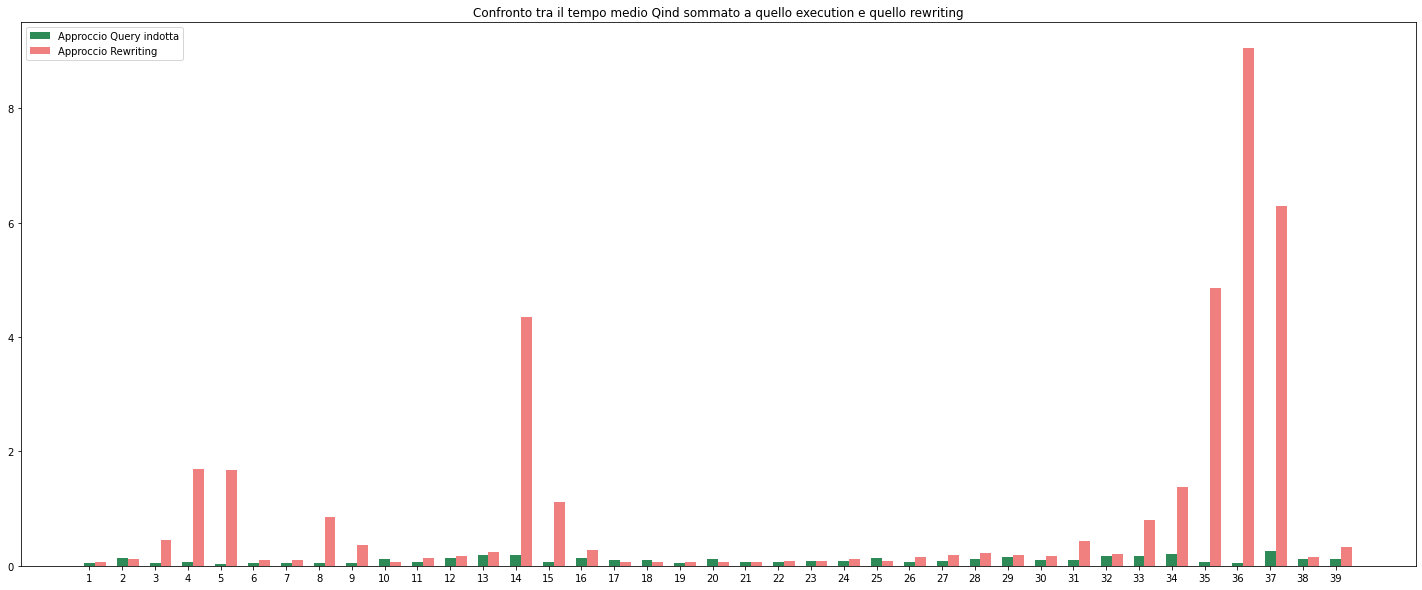

In [24]:
plt.bar(execution_Qind_df['id'],execution_Qind_df['summed_avg_time_exec_qind'],width,color='seagreen',label='Approccio Query indotta')
plt.bar(rewriting_df['id']+width,rewriting_df['qcut_mean_summed_time'],width,color='lightcoral',label ='Approccio Rewriting')
plt.xticks(execution_Qind_df['id'])
plt.title("Confronto tra il tempo medio Qind sommato a quello execution e quello rewriting")
plt.legend(loc = 'upper left')
plt.plot()

In [ ]:
plt.bar(execution_Qind_df['id'],execution_Qind_df['average_time_exec_Qind'],width,color='seagreen',label='execution_Qind approach')
plt.bar(rewriting_df['id']+width,rewriting_df['qcut_mean_summed_time'],width,color='lightcoral',label ='rewriting_df approach')
plt.xticks(execution_Qind_df['id'])
plt.title("Confronto tra tempi medi")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

[]

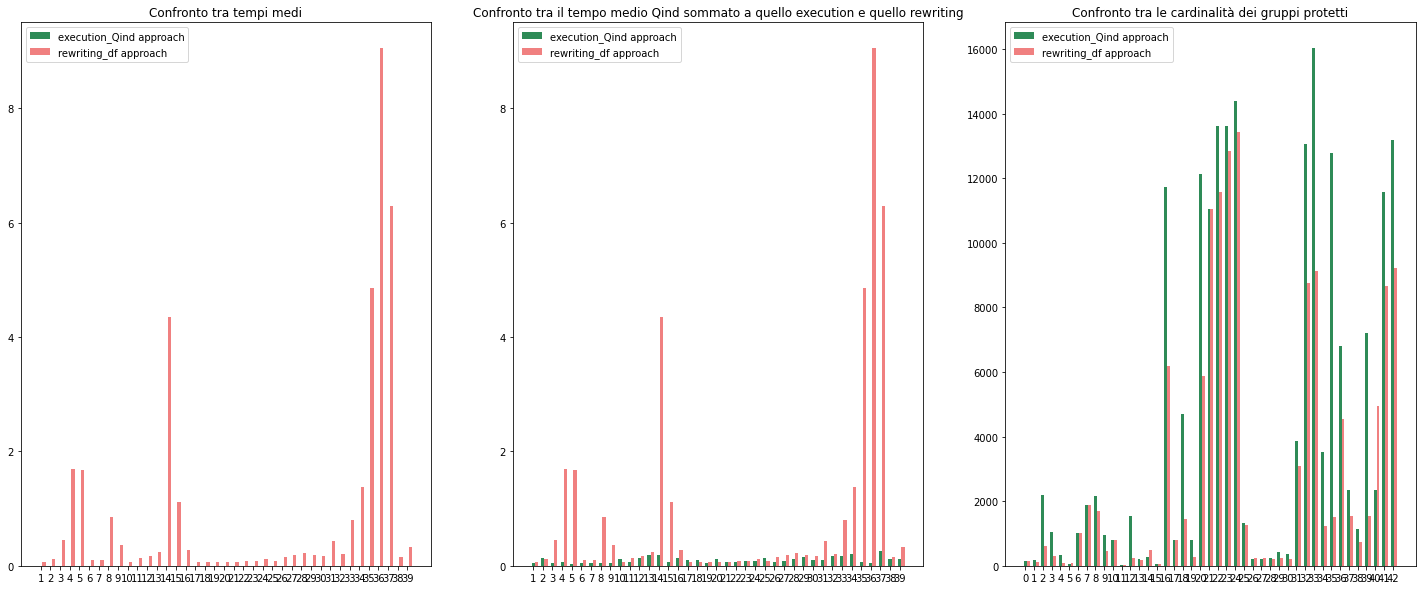

In [39]:
plt.subplot(1,3,1)
plt.bar(execution_Qind_df['id'],execution_Qind_df['average_time_exec_Qind'],width,color='seagreen',label='execution_Qind approach')
plt.bar(rewriting_df['id']+width,rewriting_df['qcut_mean_summed_time'],width,color='lightcoral',label ='rewriting_df approach')
plt.xticks(execution_Qind_df['id'])
plt.title("Confronto tra tempi medi")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()
plt.subplot(1,3,2)
plt.bar(execution_Qind_df['id'],execution_Qind_df['summed_avg_time_exec_qind'],width,color='seagreen',label='execution_Qind approach')
plt.bar(rewriting_df['id']+width,rewriting_df['qcut_mean_summed_time'],width,color='lightcoral',label ='rewriting_df approach')
plt.xticks(execution_Qind_df['id'])
plt.title("Confronto tra il tempo medio Qind sommato a quello execution e quello rewriting")
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()
plt.subplot(1,3,3)
test2_exec_qind = manage_column_with_long_value_two(execution_Qind_df['card_true_sa_Qind'])
plt.bar(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['card_true_sa_Qind']),width,color='seagreen',label='execution_Qind approach')
plt.bar(range(len(test2_exec_qind))+width,manage_column_with_long_value_two(rewriting_df['card_true_sa_newQ']),width,color='lightcoral',label ='rewriting_df approach')
plt.title("Confronto tra le cardinalità dei gruppi protetti")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

Anche in questo caso il tempo medio per Query è sempre minore nel caso della Query indotta e le cardinalità del gruppo protetto sono più simili che nel confronto fatto subito prima.

[]

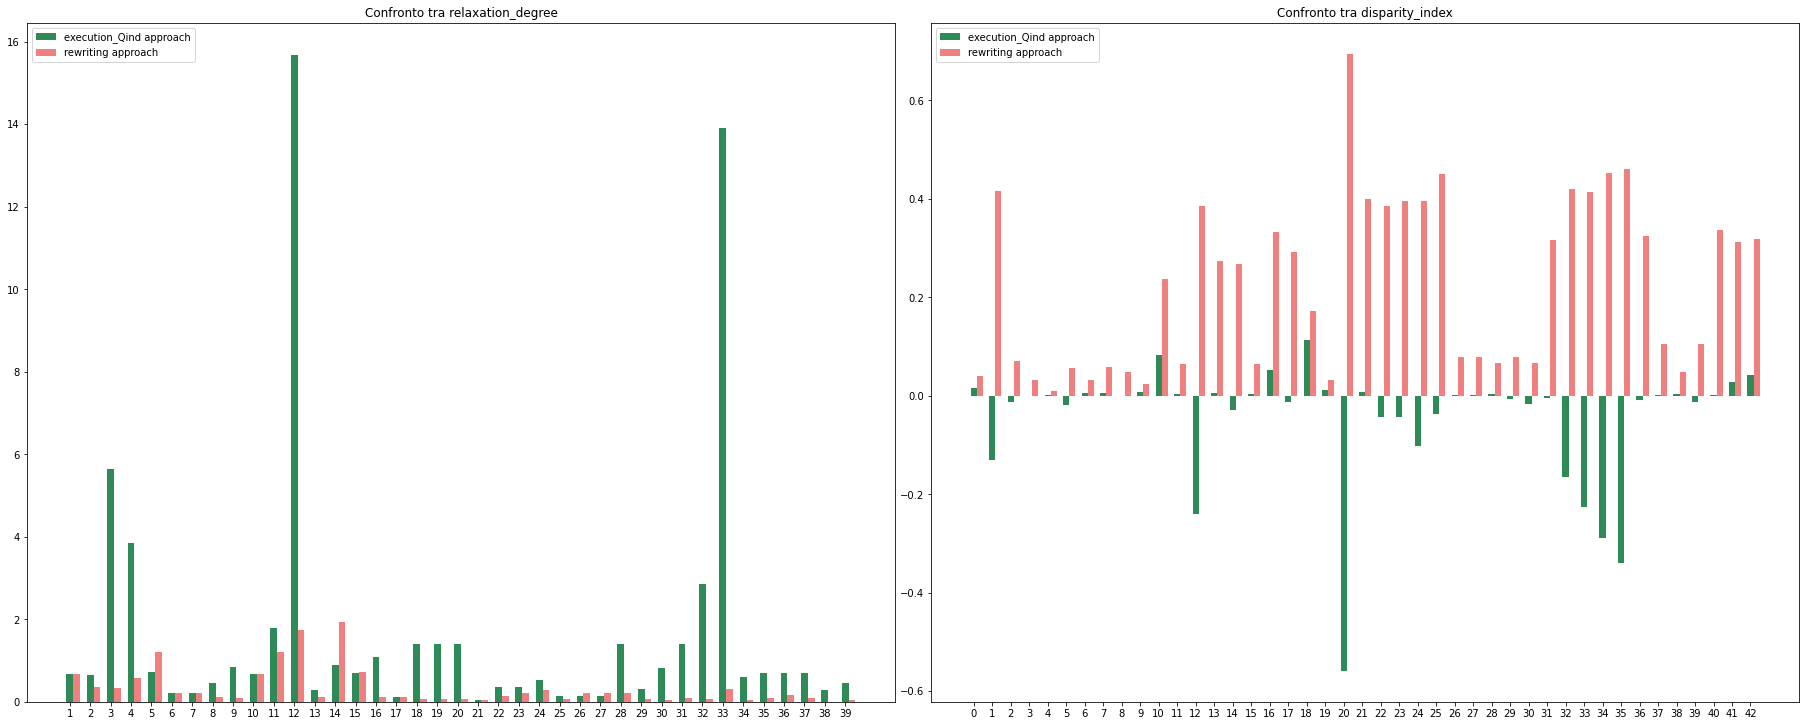

In [33]:
plt.subplot(1,2,1)
plt.bar(execution_Qind_df['id'],execution_Qind_df['relaxation_degree_Qind'],width,color='seagreen',label='execution_Qind approach')
plt.bar(rewriting_df['id']+width,rewriting_df['relaxation_degree'],width,color='lightcoral',label ='rewriting approach')
plt.xticks(execution_res_df['id'])
plt.title("Confronto tra relaxation_degree")
plt.legend(loc = 'upper left')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()
plt.subplot(1,2,2)
plt.bar(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['disparity_index_Qind']),width,color='seagreen',label='execution_Qind approach')
plt.bar(range(len(test2_exec_qind))+width,manage_column_with_long_value_two(rewriting_df['disparity_index']),width,color='lightcoral',label ='rewriting approach')
plt.title("Confronto tra disparity_index")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

[]

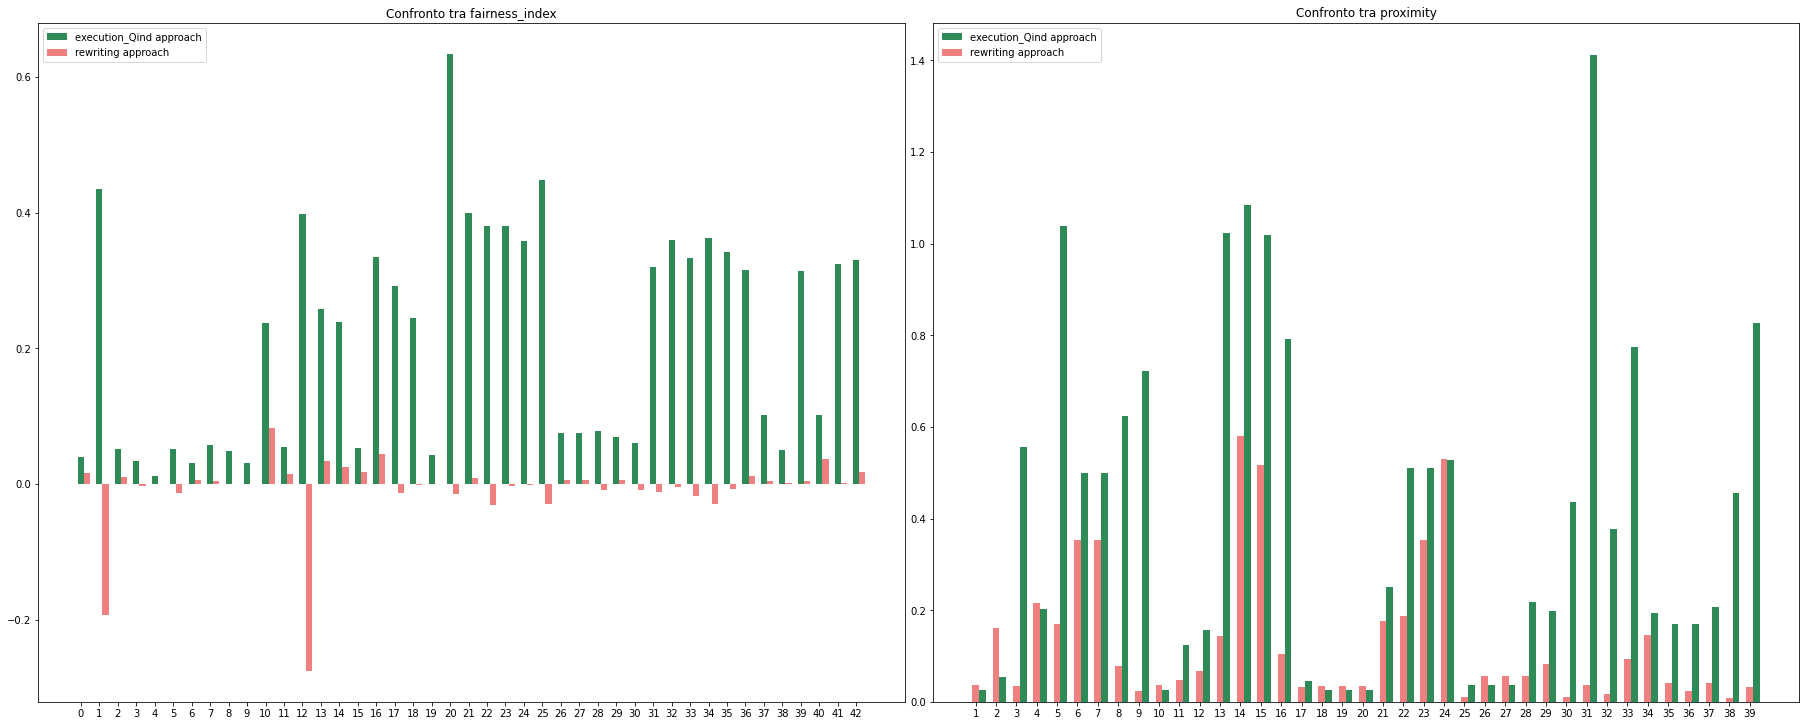

In [34]:
plt.subplot(1,2,1)
plt.bar(range(len(test2_exec_qind)),manage_column_with_long_value_two(execution_Qind_df['fairness_index_Qind']),width,color='seagreen',label='execution_Qind approach')
plt.bar(range(len(test2_exec_qind))+width,manage_column_with_long_value_two(rewriting_df['fairness_index']),width,color='lightcoral',label ='rewriting approach')
plt.title("Confronto tra fairness_index")
plt.xticks(range(len(test2_exec_qind)))
plt.legend(loc = 'upper left')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()
plt.subplot(1,2,2)
plt.bar(execution_Qind_df['id']+width,execution_Qind_df['proximity_Qind'],width,color='seagreen',label='execution_Qind approach')
plt.bar(rewriting_df['id'],rewriting_df['proximity_qcut'],width,color='lightcoral',label ='rewriting approach')
plt.xticks(execution_res_df['id'])
plt.title("Confronto tra proximity")
plt.legend(loc = 'upper left')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.plot()

In [35]:
proximity_comp = np.where(rewriting_df['proximity_qcut']<execution_Qind_df['proximity_Qind'],True,False)
proximity_comp

array([False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

The lower the proximity, the closer the AOR to the input
query, from a syntactic point of view.
Perciò vediamo che il metodo rewriting riscrive le query in modo più simile alla query iniziale. 